# 1 Background
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Cancer is a genetic disorder caused by the long-term combination of multiple factors and is one of the leading causes of death worldwide.For many years, scientists and medical professionals have been working on the diagnosis and treatment of cancer. IARC estimated that by 2040, the annual global new cancer cases will exceed 27 million. If cancer can be early detected , the survival rate can be increased under effective treatment. The five-year survival rate for early diagnosis and late diagnosis is 91% and 26%, respectively. Hence, the early detection of cancer is critical for effective patient treatment.
</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Recently, researchers have developed a new blood test to detect seven different cancer types by analyzing unique DNA fragment patterns from cancer cells. By examining cfDNA, the method detects an anomaly in the size and quantity of cfDNA in different genome regions based on the packaging method. Healthy samples have similar fragment characteristics, while cancer samples have more diverse fragment characteristics and are less likely to be matched with the healthy samples. Since the method is accessible, simple, and inexpensive, such an approach has the potential to be more cost-effective than other cancer screening tests, including other cfDNA tests.
</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Advancements in computer technology have enabled the integration of machine learning, deep learning, and other cutting-edge technologies in cancer detection. Traditional methods of cancer diagnosis rely primarily on the analysis of histological images by pathologists, which can be subjective, inefficient, and prone to personal biases. In contrast, machine learning models can learn from vast amounts of data to identify subtle differences between cancerous and non-cancerous tissue, without the influence of individual subjectivity. By assisting medical personnel in decision-making, machine learning methods can significantly improve the accuracy of cancer detection and accelerate the process of cancer detection and treatment.
</p>

# 2 Introduction
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Researchers have developed a new blood test to detect seven different cancer types by analyzing unique DNA fragment patterns from cancer cells. Cell-free DNA (cfDNA) is a degraded DNA fragment released into blood plasma that is present in various body fluids and changes in concentration with tissue damage, cancer, and inflammatory responses. By examining cfDNA, the method detects an anomaly in the size and quantity of cfDNA in different genome regions based on the packaging method. Healthy samples have similar fragment characteristics, while cancer samples have more diverse fragment characteristics and are less likely to be matched with the healthy samples. Since the method is accessible, simple, and inexpensive, such an approach has the potential to be more cost-effective than other cancer screening tests, including other cfDNA tests.
</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In the project, cfDNA information of 423 patients was collected and used, combined with traditional machine learning methods such as SVM, Decision Tree, Random Forest, to determine the cancer type of cancer patients. The raw data were preliminarily processed and contained 44 explanatory variables and 1 response variable. To provide data insight, before inputting the data into the classifier, dimensionality reduction methods (such as t-distributed Stochastic Neighbor Embedding) are first used to visualize the data to observe the data distribution. Feature selection is performed on the data, observing the importance and contribution of each feature. To better understand cfDNA indicators between patients with different types of cancer and healthy people, the feature distribution will be visualized. During the evaluation phase, we chose Accuracy and AUC_ROC as the evaluation metrics for assessing the model's performance. Based on the analysis of previous references, if AUC_ROC values are greater than 0.9 when applying traditional machine learning methods to the cfDNA dataset for classification, we can consider it as a good result.
</p>



In [1]:
import sys
print(sys.version)

3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]


# 3 Data Description and Feature Selection
## 3.1 Data Description
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In this project, we base on the dataset of cell-free DNA fragmentation data with 423 patient records in total.For each record, we can obtain 44 explanatory variables and one response variable.
</p>

In [1]:
import pandas as pd

# raw_data_2 = pd.ExcelFile('../../Data/data2.xlsx')
# dfs = {sheet: raw_data_2.parse(sheet) for sheet in raw_data_2.sheet_names}
# 
# data1 = dfs['7']
# data2 = dfs['1'].loc[:,['Patient','Age at Diagnosis']].drop([554]).drop_duplicates()
# 
# raw_data_1 = pd.read_csv('../../Data/data1.csv')
# combined_data = (data1.set_index('Patient').join(data2.set_index('Patient'))
#                  .join(raw_data_1.set_index('Patient')))
# combined_data.to_csv('combined_data.csv', index=False)
combined_data = pd.read_csv('combined_data.csv')
combined_data

FileNotFoundError: [Errno 2] No such file or directory: 'combined_data.csv'

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
The patient data included nine diagnoses: Breast Cancer, Cholangiocarcinoma, Colorectal Cancer, Gastric Cancer, Healthy, Lung Cancer, Ovarian Cancer, Pancreatic Cancer, and Duodenal Cancer. However, there was only one diagnosis for Duodenal Cancer, and to prevent category imbalance, we removed this data during the pre-processing stage. As a result, we used a total of 422 data for model training and testing.The distribution of patient diagnosis results is shown in the figure below
</p>

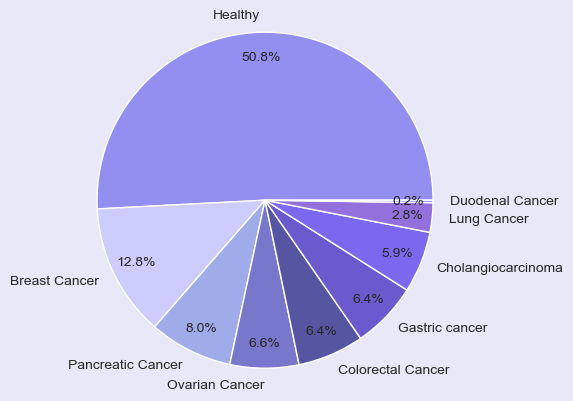

In [14]:
from numpy import *
from sklearn import *
import matplotlib.pyplot as plt

# data_without_healthy = combined_data[~combined_data['Patient Type'].isin(['Healthy'])]
# data_without_healthy.loc[:,'Patient Type']

type_counts = combined_data['Patient Type'].value_counts()

colors = ['#928FF0', "#ccccfd", "#a0abe9","#7777cb", "#5655a2", '#6A5ACD','#7B68EE', '#9370DB']
fig, ax = plt.subplots()
fig.patch.set_facecolor('#e8e8f8')
ax.pie(type_counts, labels=type_counts.index, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')
# ax.set_title('Patient Type Distribution', pad = 20)
plt.show()

In [7]:
# 修改标签至 Healthy and Cancer
rows_to_update = combined_data[combined_data['Patient Type'] != 'Healthy']
combined_data.loc[rows_to_update.index, 'Patient Type'] = 'Cancer'

# LabelEncoder是一个用于将类别标签转换为数值标签的工具，它可以将每个唯一的类别标签映射到一个整数值
label_transform = preprocessing.LabelEncoder().fit(combined_data['Patient Type'])
# label_transform对数据中的['Patient Type']列进行转换，将类别标签转换为数值标签，转换后的结果存储在新的列label中
combined_data = combined_data.copy()
combined_data.loc[:, 'label'] = label_transform.transform(combined_data.loc[:, 'Patient Type'])
# 删除Patient Type列
type_transformed_data = combined_data.drop(['Patient Type'],axis = 1)
type_transformed_data

,Median cfDNA Fragment Size (bp),GC Corrected Fragment Ratio Profile*,Age at Diagnosis,PA Score,% of Mapped Reads Mapping to Mitochondria,Z Score (chr1p),Z Score (chr1q),Z Score (chr2p),Z Score (chr2q),Z Score (chr3p),...,Z Score (chr17q),Z Score (chr18p),Z Score (chr18q),Z Score (chr19p),Z Score (chr19q),Z Score (chr20p),Z Score (chr20q),Z Score (chr21q),Z Score (chr22q),label
0,163,0.526793,69.0,23.743120,0.000484,-20.271939,-18.185445,25.086292,26.201187,-102.967989,...,-16.303811,-25.222245,-27.266292,-0.536373,-7.887892,26.073279,25.465511,-8.719837,-11.603982,0
1,166,0.883525,51.0,2.025100,0.000270,-1.360357,-1.689020,-1.415853,-1.352942,-2.309886,...,-0.727107,2.063646,-2.022041,1.847863,1.541888,-0.001581,-0.207458,-0.417619,0.629695,0
2,166,0.920598,55.0,6.660453,0.000748,5.375687,5.636012,5.377756,5.555101,6.744645,...,-0.323512,-3.704945,-3.863928,-0.870902,-1.427478,-1.085619,-0.583177,-1.625822,-0.660095,0
3,166,0.890421,67.0,3.581623,0.000188,-1.434739,-1.592492,-0.844961,-1.044544,-3.685217,...,0.118848,3.350513,-1.159501,2.380443,1.885484,-1.572366,0.089227,0.829768,2.570636,0
4,166,0.869467,76.0,2.282642,0.000369,-1.993784,-1.630529,-0.161714,-0.600607,-0.923023,...,-1.706729,1.162200,0.637965,0.447714,1.125703,1.119599,0.665633,0.628188,0.664146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,169,0.909439,58.0,3.158140,0.000696,-0.728686,0.682219,-0.635536,-0.464875,-4.373167,...,0.850134,2.908567,0.082793,0.843815,0.078499,-2.936774,-1.005063,0.221412,1.058631,0
419,170,0.885311,69.0,4.740439,0.003245,0.110236,0.788661,-2.006302,0.703965,-3.931147,...,-0.765034,6.026953,-0.978510,0.320295,-0.582474,-3.977224,-1.848848,0.799395,-0.032981,0
420,170,0.829526,70.0,5.535665,0.001851,-2.613600,-0.651890,-0.554435,2.991711,-0.313590,...,-4.321484,6.748288,1.583974,-0.082248,-1.639798,-2.171369,-3.229937,-0.128449,-1.201926,0
421,168,0.884645,58.0,4.966336,0.000490,0.114106,1.111947,1.088986,-0.903376,-2.511886,...,1.224385,3.496081,-1.359606,-0.627012,-1.045010,-0.049873,1.883713,0.165317,1.342214,0


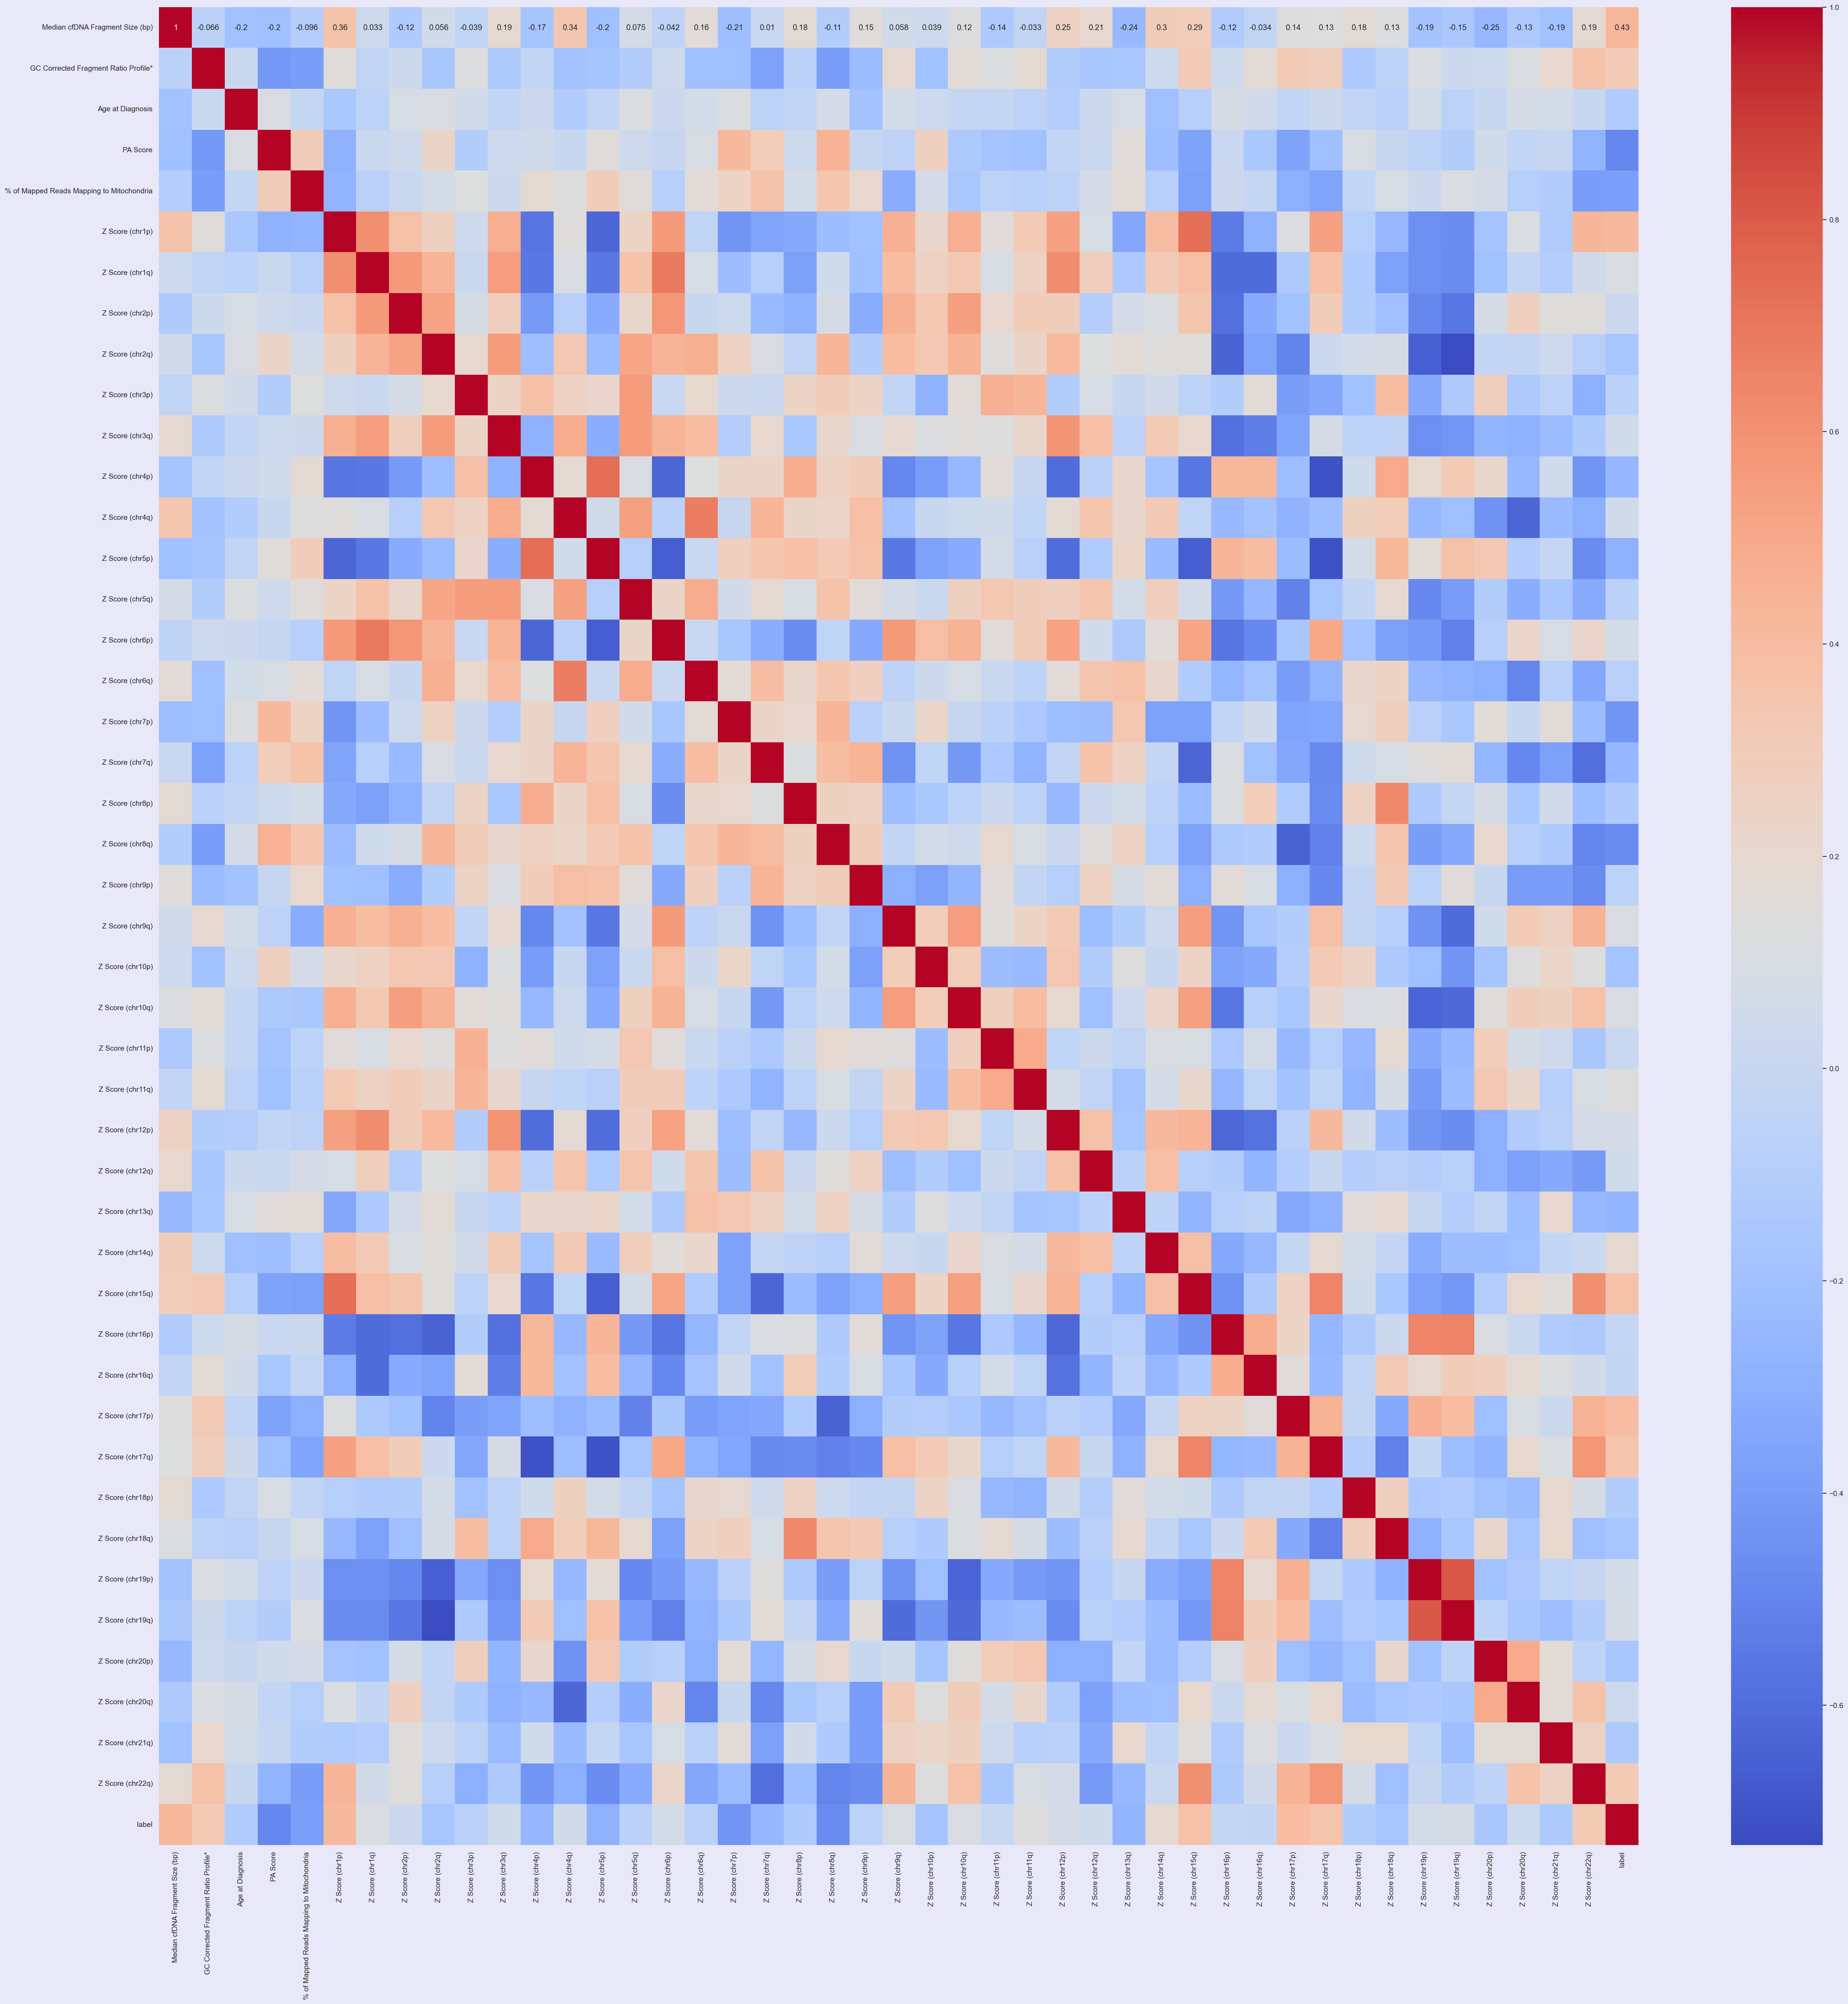

In [9]:
import seaborn as sns
correlation_matrix = type_transformed_data.corr(method='spearman')
plt.figure(figsize=(50, 50)) # 设置图形大小
sns.set(rc={'axes.facecolor':'green', 'figure.facecolor':'#e8e8f8'})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of Type Transformed Data')
plt.show()

In [7]:
x = type_transformed_data.iloc[:, 0:44]
x[isnan(x)] = 0
y=type_transformed_data.iloc[:,44]
labels = []
for i in range(0, 2):
    labels.append(label_transform.inverse_transform([i])[0])
labels

['Cancer', 'Healthy']

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In order to provide data insights, we visualized the dataset by utilizing dimensional reduction methods such as t-distributed Stochastic Neighbor Embedding, Principal Component Analysis, and Spectral Embedding.
</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
T-Distributed Stochastic Neighbor Embedding is an effective technique for reducing the dimensionality of high-dimensional data while preserving its local structure in a low-dimensional space. It ensures that similar data points remain similar in the low-dimensional space while dissimilar ones remain dissimilar. T-SNE is particularly useful for downscaling high-dimensional data to 2 or 3 dimensions, making it easier to explore and visualize the structure of complex data.
</p>

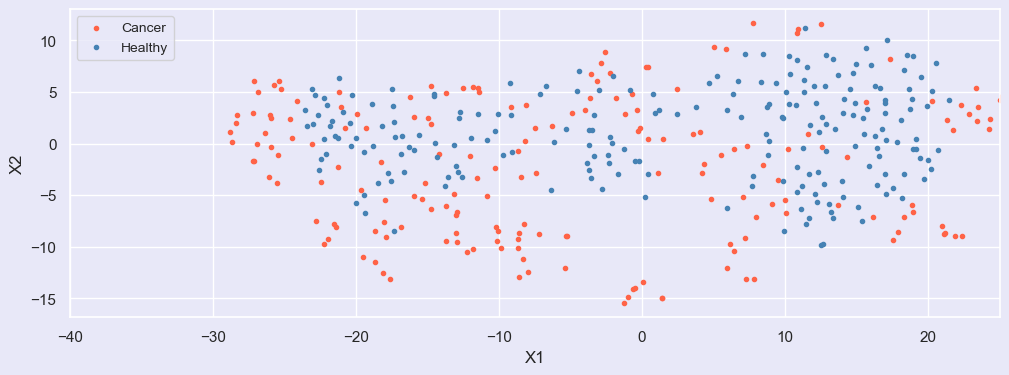

In [8]:
# TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

x_new = TSNE(n_components=2, random_state=100, learning_rate='auto', init='random').fit_transform(x)

fig = plt.figure(figsize=(12,4))

# Dictionary to hold x1 and x2 values for each type
types_data = {i: {'x1': [], 'x2': []} for i in range(8)}

# Populate the dictionary with x1 and x2 values based on type
for i, y_val in enumerate(y):
    types_data[y_val]['x1'].append(x_new[i][0])
    types_data[y_val]['x2'].append(x_new[i][1])

# Define colors for each type
colors = ['tomato','steelblue', 'slateblue']

# Plot scatter plots for each type
for i, (x1, x2) in enumerate(zip(types_data.values(), colors)):
    if i == 4:
        plt.scatter(x1['x1'], x1['x2'], c=x2, marker='2')
    plt.scatter(x1['x1'], x1['x2'], c=x2, marker='.')

# Assuming le is a LabelEncoder object and its inverse_transform method is available
plt.legend(labels, loc=2, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
# plt.title('t-distributed Stochastic Neighbor Embedding', fontsize=12)
plt.xlim(-40, 25)
plt.show()


<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Principal Component Analysis (PCA) is a statistical method used to reduce the dimensionality of a dataset while preserving the main features of the data. It does this by finding the main directions of variation in the data (i.e., principal components.) The main role of PCA is data dimensionality reduction, which helps us understand the intrinsic structure of the data, and it can also be used for data compression and feature extraction.
</p>

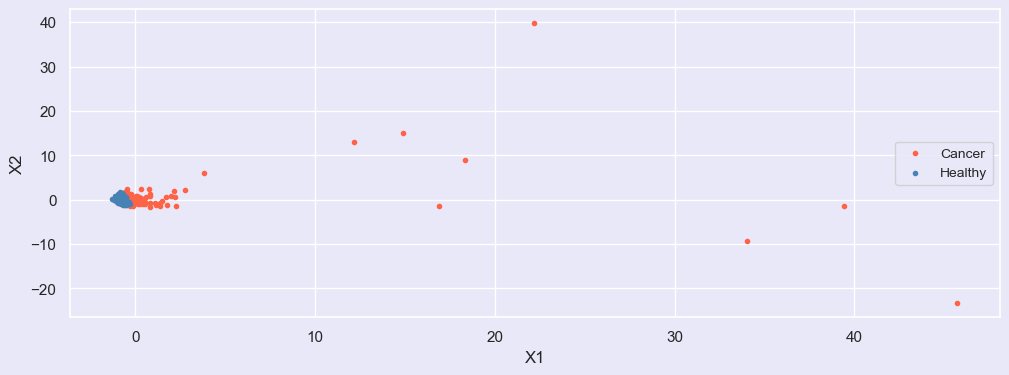

In [9]:
'''PCA'''
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Assuming x and y are already defined
x_new = preprocessing.scale(x)
x_new = PCA(n_components=2).fit_transform(x_new)

fig = plt.figure(figsize=(12, 4))

# Dictionary to hold x1 and x2 values for each type
types_data = {i: {'x1': [], 'x2': []} for i in range(8)}

# Populate the dictionary with x1 and x2 values based on type
for i, y_val in enumerate(y):
    types_data[y_val]['x1'].append(x_new[i][0])
    types_data[y_val]['x2'].append(x_new[i][1])

# Define colors for each type
colors = ['tomato', 'steelblue', 'slateblue']

# Plot scatter plots for each type
for i, (x1, x2) in enumerate(zip(types_data.values(), colors)):
    if i == 4:
        plt.scatter(x1['x1'], x1['x2'], c=x2, marker='2')
    plt.scatter(x1['x1'], x1['x2'], c=x2, marker='.')

# Assuming label_transform is a LabelEncoder object and its inverse_transform method is available
plt.legend(labels, loc=5, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
# plt.title('Principal Component Analysis', fontsize=12)
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Spectral Embedding is a dimensionality reduction method used in data analysis and machine learning that is based on the spectral theory of graph theory. This method is able to effectively map high-dimensional data into a low-dimensional space while preserving the local and global structure in the data. Unlike linear methods of PCA, Spectral Embedding is also able to recognise non-linear patterns in the data.
</p>

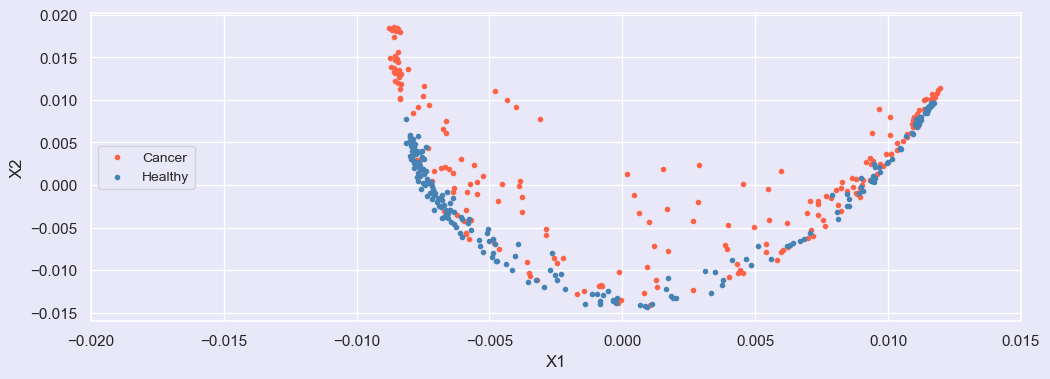

In [10]:
'''Spectral Embedding'''
from sklearn.manifold import SpectralEmbedding

x_new = SpectralEmbedding(n_components=2).fit_transform(x)
fig = plt.figure(figsize=(12, 4))

# Dictionary to hold x1 and x2 values for each type
types_data = {i: {'x1': [], 'x2': []} for i in range(8)}

# Populate the dictionary with x1 and x2 values based on type
for i, y_val in enumerate(y):
    types_data[y_val]['x1'].append(x_new[i][0])
    types_data[y_val]['x2'].append(x_new[i][1])

# Define colors for each type
colors = ['tomato', 'steelblue', 'slateblue']

# Plot scatter plots for each type
for i, (x1, x2) in enumerate(zip(types_data.values(), colors)):
    if i == 4:
        plt.scatter(x1['x1'], x1['x2'], c=x2, marker='2')
    plt.scatter(x1['x1'], x1['x2'], c=x2, marker='.')

# Assuming label_transform is a LabelEncoder object and its inverse_transform method is available
plt.legend(labels, loc=6, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
# plt.title('Spectral Embedding', fontsize = 15)
plt.xlim(-0.020, 0.015)

plt.subplots_adjust(hspace=0.4) # Adjust the space
plt.show()


<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
The visualisation results of the above three methods show that the classification is not ideal, which indicates that other methods are needed for data classification.
</p>

### Feature Ranking
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In addition, we used random forest in the original data features to plot feature rankings based on three metrics (accuracy decline, Gini purity decline, and recursive feature elimination). In accuracy and purity ranking, the sequence of features is basically the same. However, in recursive feature elimination, the rankings appear in a different order than before. It illustrates the complexity of cancer detection and the need for subsequent classification using different methods.
</p>


In addition, we used random forest in the original data features to plot feature rankings based on three metrics (accuracy decline, Gini purity decline, and recursive feature elimination). In accuracy and purity ranking, the sequence of features is basically the same. However, in recursive feature elimination, the rankings appear in a different order than before. It illustrates the complexity of cancer detection and the need for subsequent classification using different methods. Figure 5 shows the results of feature sorting using three methods.
As ranked in Supplementary Table S1, the top 10 features are almost all about DNA fragment features. We also utilized random forests on these features and plotted the feature ranking in Supplementary Figure S3 based on three metrics: decrease in ac-curacy, decrease in Gini purity, and recursive feature elimination. For accuracy and purity, we observed a similar tendency as the feature ranking in Supplementary Table S1. However, for recur-sive feature elimination, we found a contrary ranking. It illustrates the complexity of cancer detection and also necessitates our subsequent methods.<br>

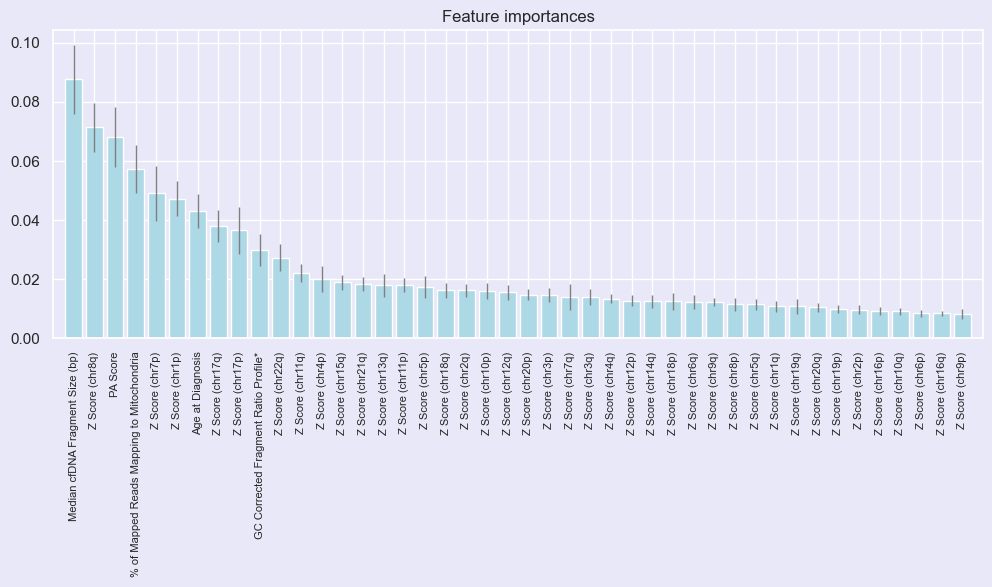

In [11]:
#---Decrese in Accuracy ---#
clf=ensemble.RandomForestClassifier(n_estimators =100, random_state = 42, class_weight="balanced")
for i in range(0,300):
    output = model_selection.cross_validate(clf, x, y, cv=10, scoring = 'accuracy', return_estimator =True)
    for idx,estimator in enumerate(output['estimator']):
        if idx==0 and i==0:
            FeatureImp = estimator.feature_importances_
        else:
            FeatureImp = vstack((FeatureImp, estimator.feature_importances_))

ImpMean = FeatureImp.mean(axis=0)        
ImpStd = FeatureImp.std(axis=0)
sorted_idx = ImpMean.argsort()[::-1]


# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(12,4))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), ImpMean[sorted_idx],
        color='lightblue', yerr=ImpStd[sorted_idx], align="center", ecolor='gray', error_kw = {'elinewidth':1})
plt.xticks(range(x.shape[1]), x.columns[sorted_idx], rotation=90, fontsize=8)
plt.xlim([-1, x.shape[1]])
plt.show()

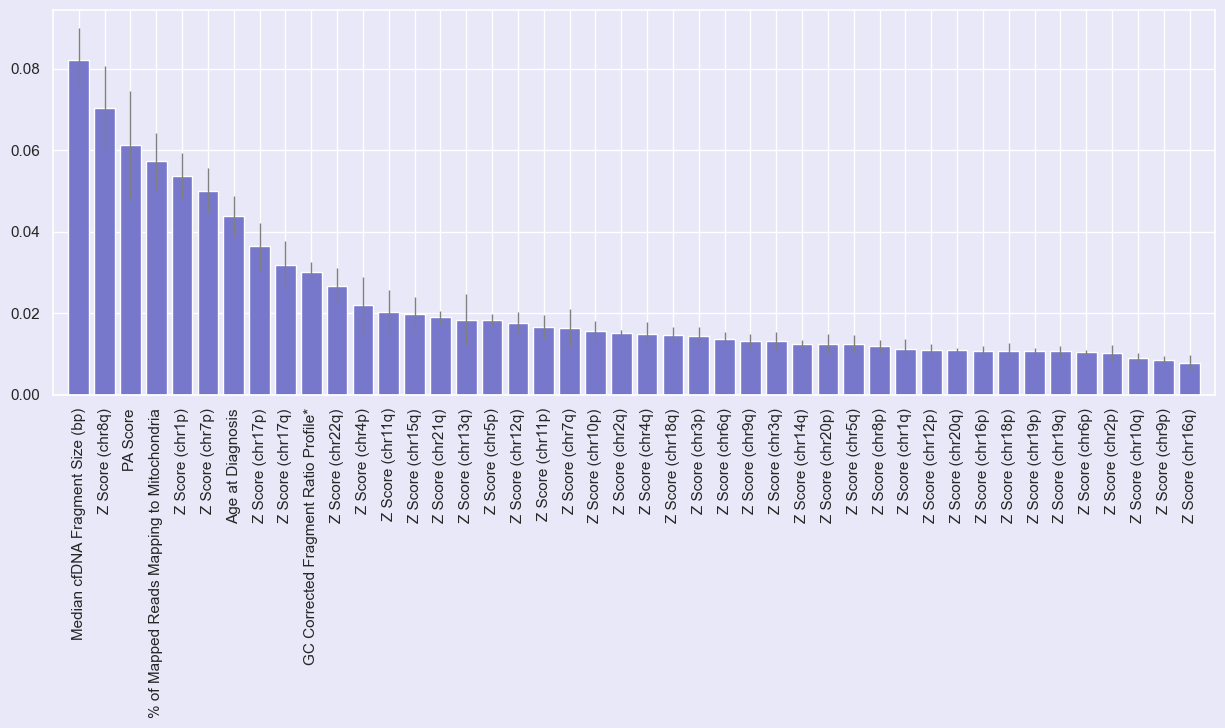

In [12]:


#---Decrese in Purity ---#
# 输入数据x  目标变量y  交叉验证的折数nfold  随机森林分类器的树的数量nestimator
def RandomCV(x,y,nfold,nestimator):
    # 使用kFold进行交叉验证
    KF = KFold(n_splits=nfold,shuffle=True, random_state=5)
    i = 0
    for train_index,test_index in KF.split(x):
        #---  Seperate traing set and test set ---#
        x_train, x_test = x.iloc[train_index][:], x.iloc[test_index][:]
        y_train = y.iloc[train_index][:]

        #---  creat and train the model ---#
        clf = ensemble.RandomForestClassifier(n_estimators =nestimator, random_state = 42, class_weight="balanced")
        clf.fit(x_train, y_train)
        if i==0:
            FeatureImp = clf.feature_importances_
        else:
            FeatureImp = vstack((FeatureImp, clf.feature_importances_))
        i+=1
    return FeatureImp

for i in range(0,300):
    if i==0:
        FeatureImp = RandomCV(x,y,5,100)
    else:
        FeatureImp = vstack((FeatureImp, RandomCV(x,y,5,100)))

ImpMean = FeatureImp.mean(axis=0)        
ImpStd = FeatureImp.std(axis=0)
sorted_idx = ImpMean.argsort()[::-1]

# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(15,5))
# plt.title("Feature importances")
plt.bar(range(x.shape[1]), ImpMean[sorted_idx],
        color='#7777cb', yerr=ImpStd[sorted_idx], align="center", ecolor='gray', error_kw = {'elinewidth':1})
plt.xticks(range(x.shape[1]), x.columns[sorted_idx],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()


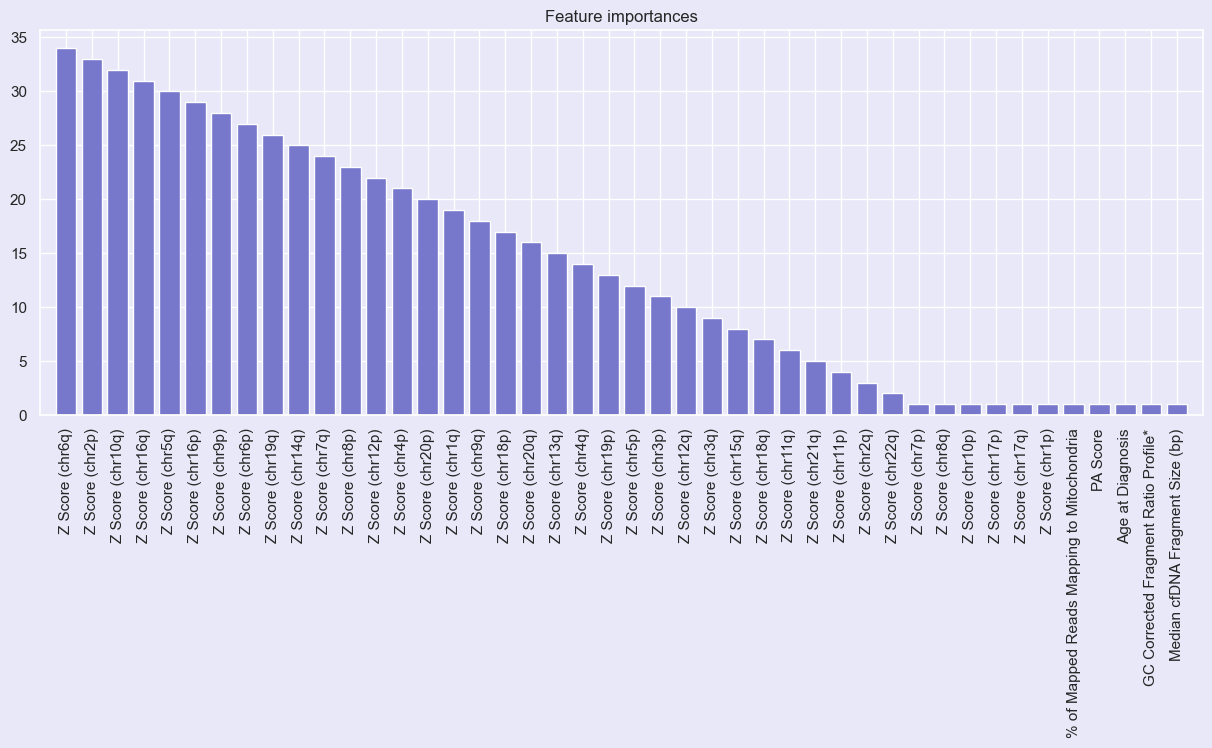

In [13]:
#---Recursive Feature Elimination ---# 
# 通过ranking_属性获取特征的排名，这个排名表示了每个特征在选择过程中被移除的次数，排名越低表示特征越重要。
from sklearn.model_selection import StratifiedKFold
clf=ensemble.RandomForestClassifier(n_estimators =31, random_state = 42, class_weight="balanced")
rfecv = feature_selection.RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),scoring='accuracy')
rfecv.fit(x, y)
rfecv.ranking_

Imp = rfecv.ranking_       
sorted_idx = Imp.argsort()[::-1]
ImpStd = Imp.std(axis=0)

fig = plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), Imp[sorted_idx],color='#7777cb')
plt.xticks(range(x.shape[1]), x.columns[sorted_idx],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

### Linear Discriminant Analysis
We also explored Linear Discriminant Analysis to separate the dataset. The results are shown in Supplementary Figure S4. Cross labels represent misclassified samples. We can observe that this sim-ple classifier cannot classify the dataset perfectly, and there are many misclassifications near the decision boundary, necessitating advanced machine learning development.

In [14]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'new_classes',
    {'red': [(0, 1, 1),
             (1, 0.7, 0.4)],
     'green': [(0, 0.9, 1), 
               (1, 0.95, 0.9)],
     'blue': [(0, 0.4, 0.85), 
              (1, 0.9, 1)]})
plt.cm.register_cmap(cmap=cmap)

# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred,ax):

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    ax.scatter(X0_tp, X0_tp, marker='.', color='gold')
    ax.scatter(X0_fp, X0_fp, marker='x',
                s=20, color='darkorange')  # dark red

    # class 1: dots
    ax.scatter(X1_tp, X1_tp, marker='.', color='deepskyblue')
    ax.scatter(X1_fp, X1_fp, marker='x',
                s=20, color='cornflowerblue')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap='new_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    ax.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    ax.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=10, markeredgecolor='grey')
    ax.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=10, markeredgecolor='grey')

    # text error
    ax.text(x_min+0.5, y_max-1, 'Error:%0.4f'%(1-accuracy_score(y, y_pred)),
                    horizontalalignment='left', verticalalignment='center', fontsize=7, color='black')

    return ax


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi
    # Create the Ellipse object without the facecolor argument
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, edgecolor='dimgray', linewidth=0.75)
    # Set the facecolor using the set_facecolor method
    ell.set_facecolor(color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'peachpuff')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'lightskyblue')

C:\Users\43492\AppData\Local\Temp\ipykernel_19724\2905329027.py:19: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

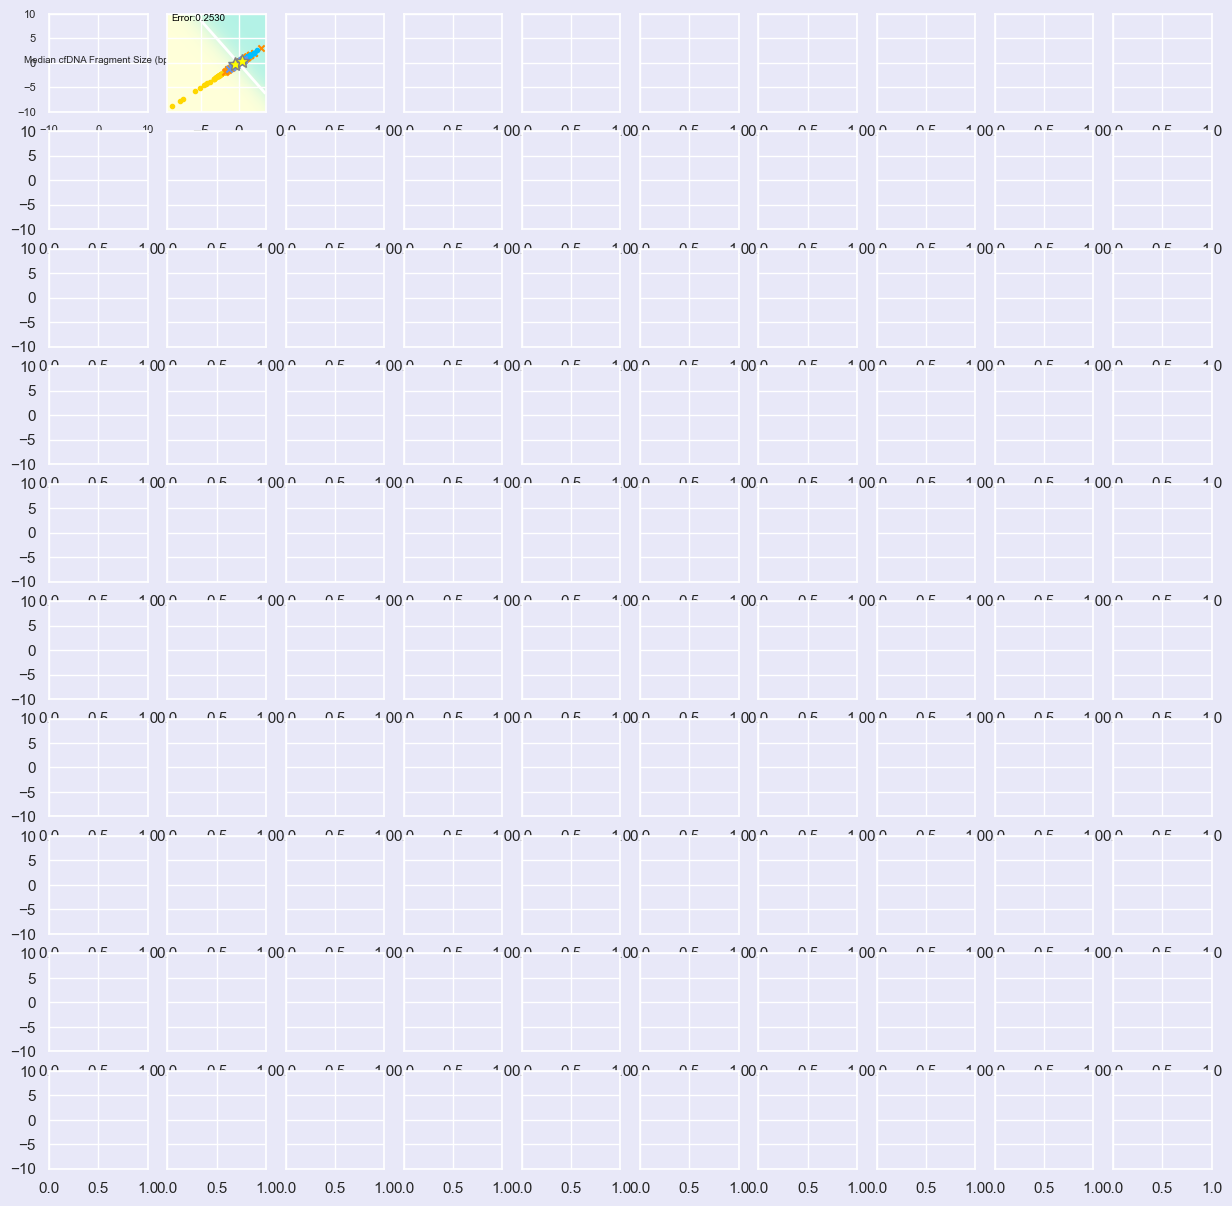

In [15]:
num = 10
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.patches as patches
x_z = preprocessing.scale(x)
fig,axes = plt.subplots(nrows=num, ncols=num,sharey=True, figsize=(15, 15))
for i in range(num):
    for j in range(num):
        if i==j:
            axes[i,j].text(0, 0, x.columns.values[i], fontsize=7, ha='center')
            axes[i,j].set_xlim(-10,10)
            axes[i,j].set_ylim(-10,10)

        else:
            x_new = x_z[:,[i,j]]
            lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
            y_pred = lda.fit(x_new, y).predict(x_new)
            axes[i,j] = plot_data(lda, x_new, y, y_pred,axes[i,j])
            plot_lda_cov(lda, axes[i,j])
            # text error
            x_min,xmax=axes[i,j].get_xlim()
            y_min,ymax=axes[i,j].get_ylim()
            axes[i,j]



        axes[i,j].tick_params(which='major',labelsize=8)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()